In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1.Dataset Overview:

Load the dataset and display the first five rows. Identify the column names and data
types. Are there any columns with inconsistent or missing data?

In [3]:
data = pd.read_csv("output2.csv")
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
#to find the info on data types and row names
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [5]:
#to find the missing values
missing = data.isnull().sum()
print(missing)


No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


THERE IS NO COLUMN WITH MISSING DATA.


In [6]:
# CHECKING INCONSISTENCIES IN DATA BY SOME LOGICAL ANALYSIS


# duplicates can lead to misleading or inaccurate analyses and conclusions
duplicates = data[data.duplicated(keep=False)]
if not duplicates.empty:
    print("Duplicate rows found:\n", duplicates)
else:
    print("No duplicate rows found.")

#CHECKING EACH COLUMN HAVE EXPECTED DATATYPE
print("\nColumn Data Types:\n", data.dtypes)

#CHECKING WETHER THERE ARE INVALID HOUSE PRICES OR NOT
invalid_prices = data[data['Y house price of unit area'] < 0]
if not invalid_prices.empty:
    print("Invalid house prices found:\n", invalid_prices)
else:
    print("\nNo invalid house prices found.")

#Checking wether the coordinates are valid
invalid_coordinates = data[(data['X5 latitude'] < -90) | (data['X5 latitude'] > 90) |
                           (data['X6 longitude'] < -180) | (data['X6 longitude'] > 180)]
if invalid_coordinates.empty:
    print("\nNo invalid coordinates.")
else:
    print(invalid_coordinates)


No duplicate rows found.

Column Data Types:
 No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

No invalid house prices found.

No invalid coordinates.


From the above data it can be concluded that there is no known inconsistencies based on the parameters I know.

2.Statistical Summary:

Generate a statistical summary (mean, median, standard deviation, minimum, and maximum) for all numerical columns. What does this summary tell you about the distribution
of house prices and other features?

In [7]:
data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


The Above function shows mean, median(50%),standard deviation, min and maximum for the given data

SUMMARY:

House Prices (Y house price of unit area):

            Prices range from 7.6 to 117.5, with a mean of 37.98 and high variability (std: 13.61).
            Higher prices are observed for newer houses, properties closer to MRT stations, and areas with more convenience stores.
            Location and transaction date influence prices significantly, with recent sales and prime urban areas commanding higher values.

House Age (X2 house age):

            Houses range in age from 0 to 43.8 years, with a mean of 17.71 years.
            Newer houses generally have higher prices due to better condition and modern amenities.
            Older houses may have lower prices unless located in premium areas or have historical value.

Distance to MRT Station (X3 distance):

            Distances vary widely from 23.38m to 6488.02m, with a mean of 1083.88m.
            Properties closer to MRT stations tend to have significantly higher prices due to better connectivity.
            Houses farther away from stations are less desirable and often cheaper.

Number of Convenience Stores (X4 stores):

            The number of stores ranges from 0 to 10, with a mean of 4.09 stores.
            Properties near more convenience stores are more desirable, contributing to higher prices.
            Areas with fewer stores tend to be less urbanized and have lower property values.

Latitude (X5 latitude):

            Values range from 24.93207 to 25.01459, reflecting a small geographic area.
            Central or prime locations (higher latitudes) tend to have higher property prices.
            The impact depends on proximity to urban hubs or desirable neighborhoods.

Longitude (X6 longitude):

            Values range from 121.47353 to 121.56627, indicating a geographically compact dataset.
            Locations with higher longitude values might correspond to central urban areas with higher prices.
            Longitude's influence depends on proximity to essential facilities and infrastructure.

Transaction Date (X1 transaction date):

            Transactions occurred between 2012.667 and 2013.583, showing a short time span.
            More recent transactions often reflect higher prices due to inflation and development.
            Temporal consistency in the data ensures uniformity in price comparisons.


3. Data Cleaning:
        Check for missing or duplicate values in the dataset. If any are found, describe how you
        would handle them programmatically in Python.

In [160]:
#to find the total missing values
missing = data.isnull().sum()
print(missing)

#to find the total duplicated values
a = data.duplicated('X1 transaction date').sum()
b = data.duplicated('X2 house age').sum()
c = data.duplicated('X3 distance to the nearest MRT station').sum()
d = data.duplicated('X4 number of convenience stores').sum()
e = data.duplicated('X5 latitude').sum()
f = data.duplicated('X6 longitude').sum()
g = data.duplicated('Y house price of unit area').sum()
h = data.duplicated('No').sum()

print(a,b,c,d,e,f,g,h)


No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64
402 178 155 403 180 182 144 0


Since there is no missing values there is no need for handling it.
But to show how to handle missing and duplicated data we can use

In [161]:
#Missing data handling

# 1. By dropping the rows with missing vlaues
data = data.dropna()
# 2. By filling the missing values with either mean or the value before or after it
data = data.fillna(data.mean())

In [162]:
#Duplicate data handling

# 1. By dropping all duplicate values after first occurance
#    Drop duplicate rows
data = data.drop_duplicates(keep='first')

# 2. We can also not drop the duplicated values if the values are needed for further analysis
#    As in the data the number of convinience stores, latitude, longitude,etc together change the price factor of the houses and removing one might lead to change in house prices.

4. Univariate Analysis:
Plot the distribution of house prices. Is the data skewed? If so, what kind of transformation might normalize it?

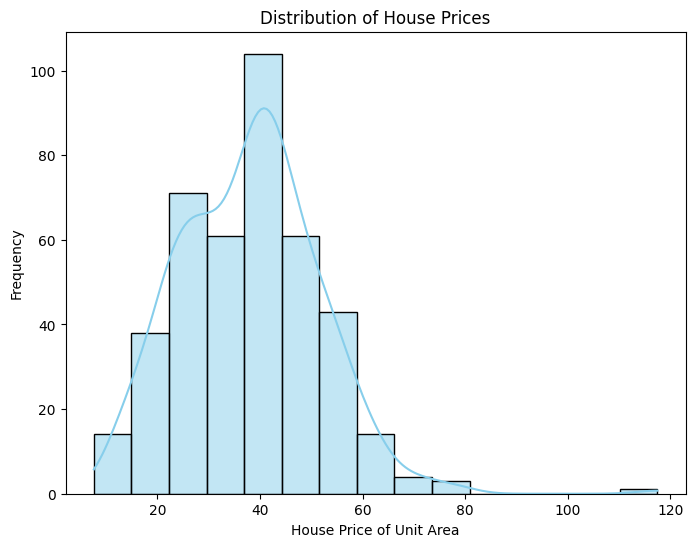

In [163]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Y house price of unit area'], kde=True, bins=15, color='skyblue')
plt.title('Distribution of House Prices')
plt.xlabel('House Price of Unit Area')
plt.ylabel('Frequency')
plt.show()

From the histogram of house prices, the data appears to be positively skewed as the tail extends towards higher values (to the right).



In [124]:
#The following Transformation mught be used to normalize the data.

#Log Transformation: Apply a log function to reduce the effect of extreme values.
data['Y house price of unit area'] = np.log(data['Y house price of unit area'] + 1)

#Square Root Transformation: A less aggressive alternative to log transformation.
data['Y house price of unit area'] = np.sqrt(data['Y house price of unit area'])

#Box-Cox Transformation: A more general transformation that finds the optimal power parameter for normalization.
from scipy.stats import boxcox
data['Y house price of unit area'], _ = boxcox(data['Y house price of unit area'] + 1)

5. Feature Exploration:
Investigate the relationship between each available feature (X1 to X6) and house prices.
Use a scatter plot to visualize the relationship and interpret the results.

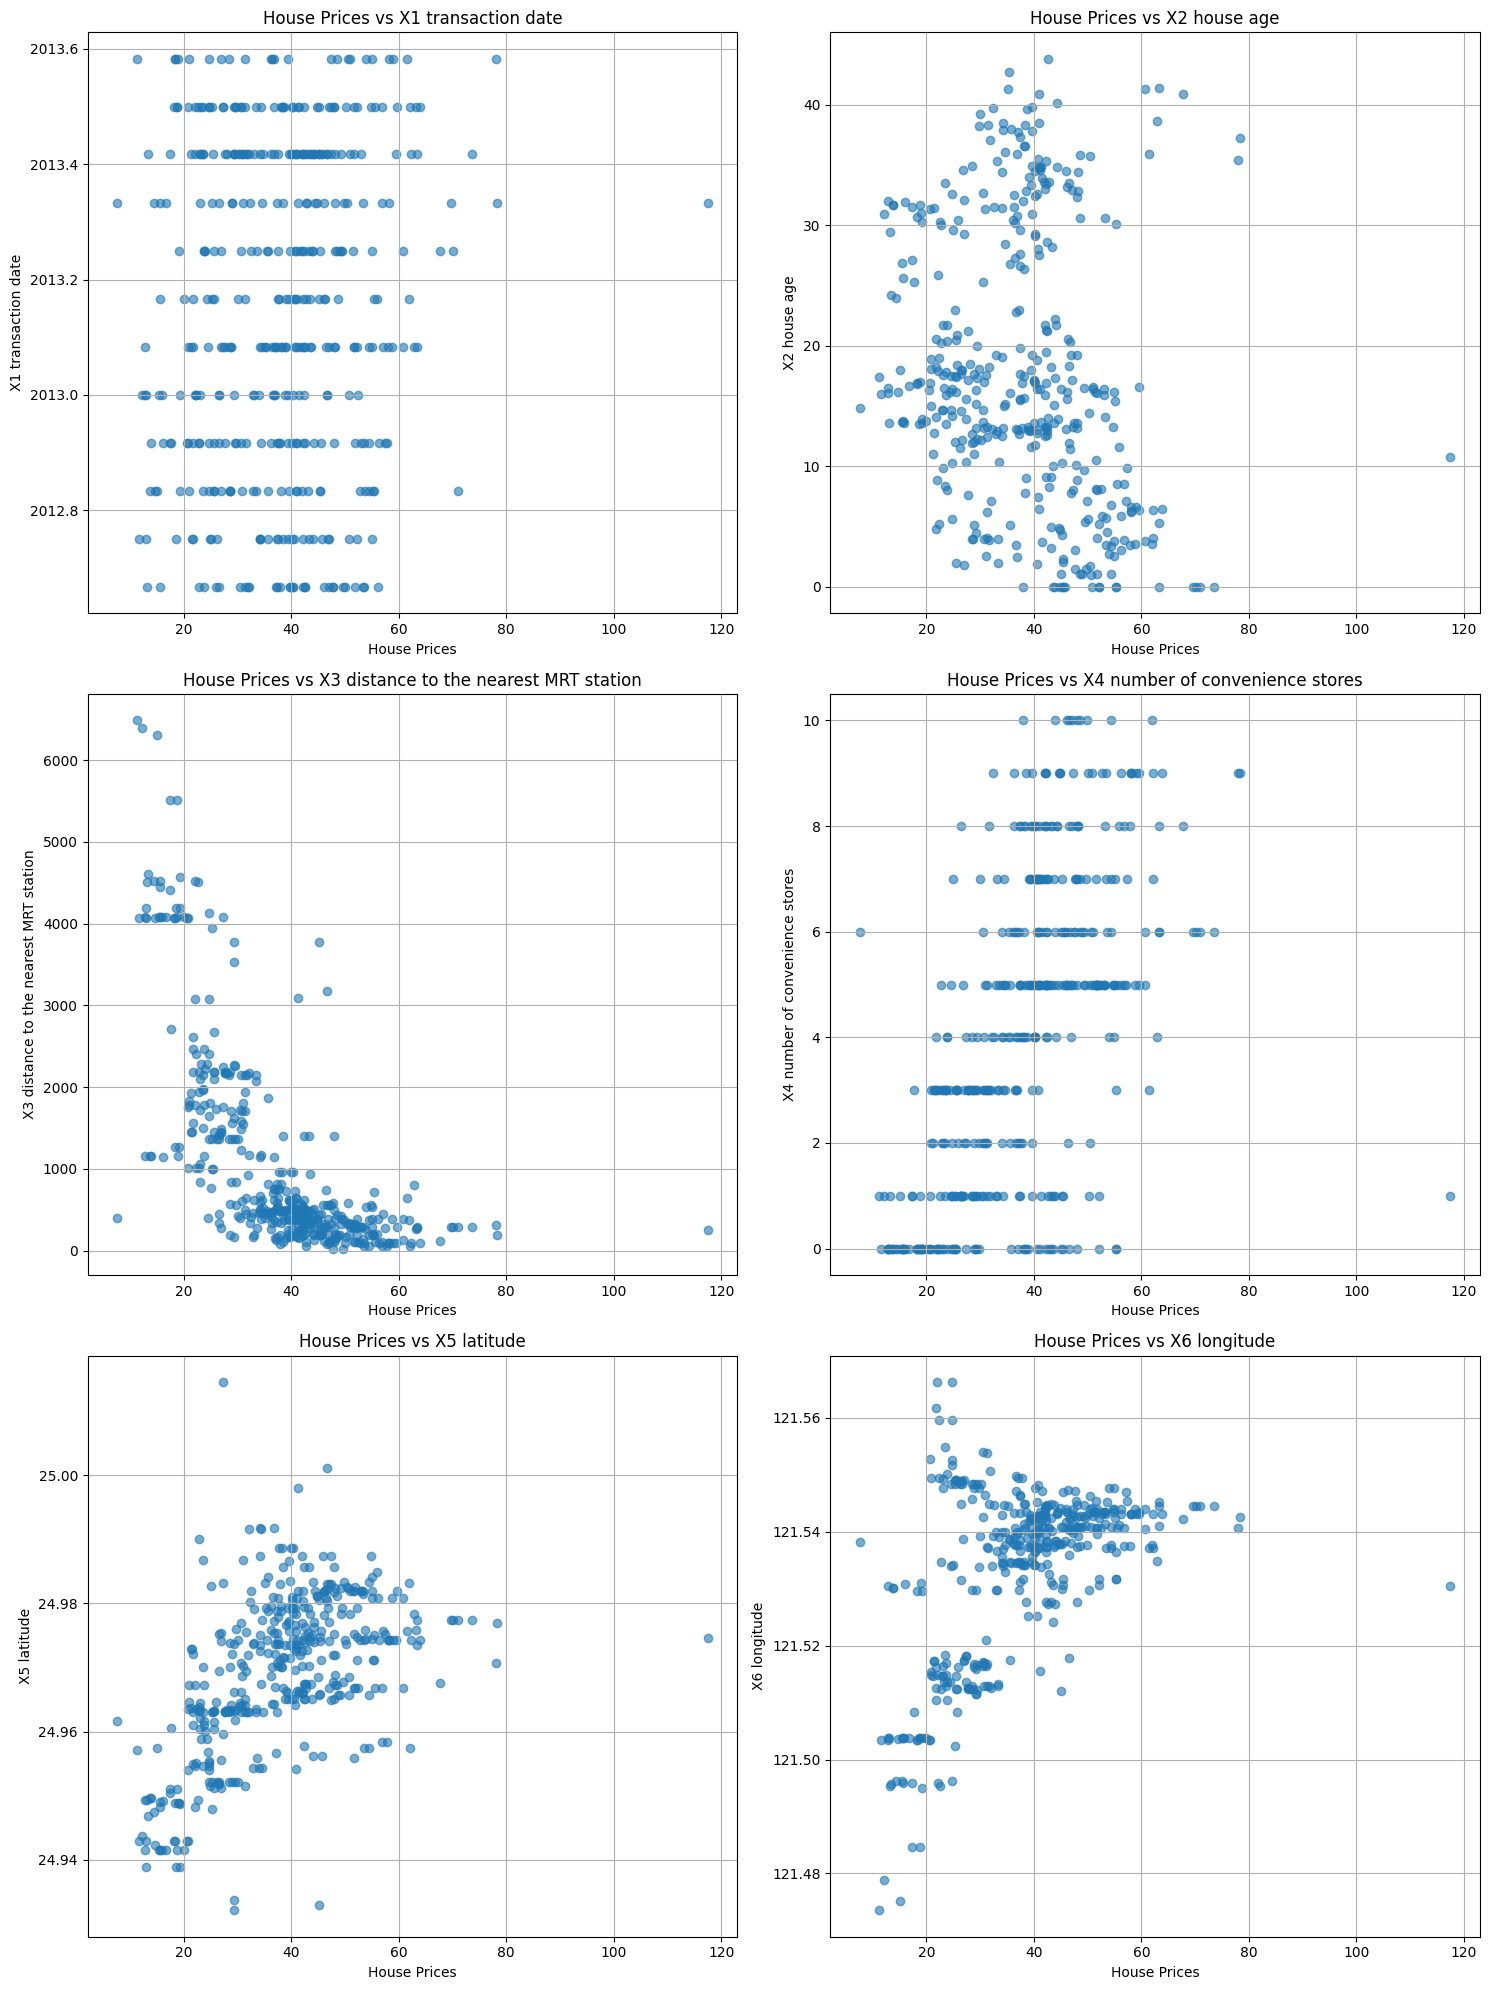

In [9]:
features = ['X1 transaction date', 'X2 house age', 
            'X3 distance to the nearest MRT station', 
            'X4 number of convenience stores', 
            'X5 latitude', 'X6 longitude']
target = 'Y house price of unit area'

plt.figure(figsize=(15, 20))
for i, feature in enumerate(features):
    plt.subplot(3, 2, i + 1)
    plt.scatter(data[target], data[feature], alpha=0.6)
    plt.title(f"House Prices vs {feature}")
    plt.xlabel("House Prices")
    plt.ylabel(feature)
    plt.grid(True)

plt.tight_layout()
plt.show()



1. House Prices vs X1 (Transaction Date):

            There seems to be no clear trend between transaction dates and house prices.
            The data points are scattered, suggesting no strong correlation.
            But many houses bought near 2013.4 .

2. House Prices vs X2 (House Age):

            House prices appear to be relatively stable across varying house ages. 
            There is no obvious upward or downward trend, indicating a weak or no correlation.

3. House Prices vs X3 (Distance to Nearest MRT Station):

            A negative correlation is observed; as the distance to the nearest MRT station increases, house prices tend to decrease.
            Proximity to public transport likely adds value to properties.

4. House Prices vs X4 (Number of Convenience Stores):

            A slight positive correlation can be seen. 
            Properties closer to more convenience stores seem to have higher house prices.

5. House Prices vs X5 (Latitude):

            There is a slight upward trend, suggesting house prices vary slightly by location in terms of latitude.

6. House Prices vs X6 (Longitude):

            There is a subtle clustering in certain longitude ranges, suggesting that house prices might depend on specific regions.
